In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats as stats
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.stats import power

## 1. 카이제곱 검정

### Q1) 카이제곱 재현
- 정규분포의 1,2,3,개의 합의 분포와 카이제곱 분포가 동일하다는 점을 보여봅시다.
- 정규 분포 자료 생성 함수는 `scipy.stats.norm.rvs` 입니다.
- 카이제곱 분포 생성 함수는 `scipy.stats.chi2.pdf` 입니다.

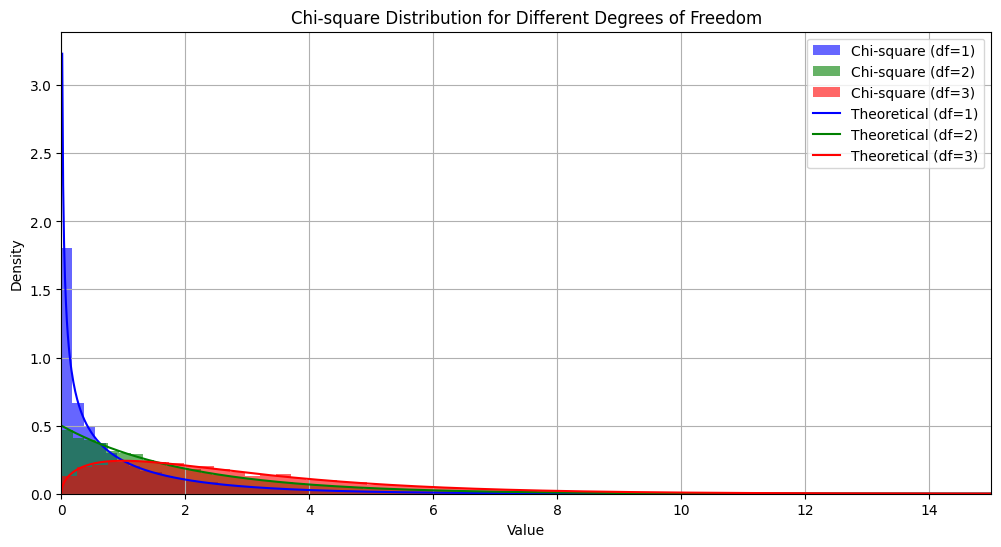

In [ ]:
#샘플 수 설정
n_samples = 10000

# Generate standard normal distributions
z1 = stats.norm.rvs(loc=0, scale=1, size=n_samples)
z2 = stats.norm.rvs(loc=0, scale=1, size=n_samples)
z3 = stats.norm.rvs(loc=0, scale=1, size=n_samples)

# Calculate chi-square distributions with 1, 2, and 3 degrees of freedom
chi2_1 = z1**2
chi2_2 = z1**2 + z2**2
chi2_3 = z1**2 + z2**2 + z3**2

# 그래프 크기와 x축 결정
plt.figure(figsize=(12, 6))
x = np.linspace(0, 15, 1000)
plt.xlim(0,15)

# 정규분포 데이터의 합으로 만든 카이제곱 그리기
plt.hist(chi2_1, bins=100, density=True, alpha=0.6, label='Chi-square (df=1)', color='blue')
plt.hist(chi2_2, bins=100, density=True, alpha=0.6, label='Chi-square (df=2)', color='green')
plt.hist(chi2_3, bins=100, density=True, alpha=0.6, label='Chi-square (df=3)', color='red')

# chi2.pdf 함수로 만든 이론적 카이제곱 그리기
plt.plot(x, stats.chi2.pdf(x, df=1), 'b-', label='Theoretical (df=1)')
plt.plot(x, stats.chi2.pdf(x, df=2), 'g-', label='Theoretical (df=2)')
plt.plot(x, stats.chi2.pdf(x, df=3), 'r-', label='Theoretical (df=3)')

# Labels and legend
plt.title('Chi-square Distribution for Different Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### 1-1 적합도 검정

In [ ]:
# 주장하는 방문 비율(%)을 기반으로 기대값을 계산
expected_ratios = np.array([10, 10, 15, 20, 30, 15])
total_visits = 200
expected_counts = (expected_ratios / 100) * total_visits

# 관찰된 방문 수
observed_counts = np.array([30, 14, 34, 45, 57, 20])

# 카이제곱 적합도 검정을 수행
chi2_stat, p_val = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}") # 11.442
print(f"P-value: {p_val:.3f}") # 0.043

# 결론 도출
alpha = 0.05  # 유의수준
if p_val < alpha:
    print("귀무가설 기각: 관찰된 방문 비율은 주장하는 비율과 다르다.")
else:
    print("귀무가설 채택: 관찰된 방문 비율은 주장하는 비율과 같다.")

Chi-squared Statistic: 11.442
P-value: 0.043
귀무가설 기각: 관찰된 방문 비율은 주장하는 비율과 다르다.


### 1-2 독립성 검정

In [ ]:
# 관찰된 데이터: 성별과 흡연 여부에 따른 빈도수
data = np.array([
    [40, 60],  # 남성: 흡연자, 비흡연자
    [30, 70]   # 여성: 흡연자, 비흡연자
])

# 카이제곱 통계량, p-value, 자유도, 기대값을 계산
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data, correction=True)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}") #1.780
print(f"P-value: {p_val:.3f}") #0.182
print(f"Degrees of Freedom: {dof:.3f}") #1.000
print("Expected frequencies:")
print(expected)
'''
[[35. 65.]
 [35. 65.]]
 '''

# 결론
alpha = 0.05  # 유의수준
if p_val < alpha:
    print("귀무가설 기각: 성별과 흡연 여부는 독립적이지 않다.")
else:
    print("귀무가설 채택: 성별과 흡연 여부는 독립적이다.")

Chi-squared Statistic: 1.780
P-value: 0.182
Degrees of Freedom: 1.000
Expected frequencies:
[[35. 65.]
 [35. 65.]]
귀무가설 채택: 성별과 흡연 여부는 독립적이다.


### Q2) 1-3 동질성 검정

In [ ]:
# 관찰된 데이터: 각 학교에서 학생들이 선호하는 과목의 빈도수
data = np.array([
    [50, 60, 55],  # 수학 선호
    [40, 45, 50],  # 과학 선호
    [30, 35, 40]   # 문학 선호
])

# 카이제곱 통계량, p-value, 자유도, 기대값을 계산
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data)

# 결과 출력
print(f"Chi-squared Statistic: {chi2_stat:.3f}")# 0.817
print(f"P-value: {p_val:.3f}") # 0.936
print(f"Degrees of Freedom: {dof:.3f}") # 0.400
print("Expected frequencies:")
print(expected.round(3))

'''
[[48.889 57.037 59.074]
 [40.    46.667 48.333]
 [31.111 36.296 37.593]]
'''

# 결론
alpha = 0.05  # 유의수준
if p_val < alpha:
    print("귀무가설 기각: 각 학교에서 과목 선호도는 동일하지 않다.")
else:
    print("귀무가설 채택: 각 학교에서 과목 선호도는 동일하다.")

Chi-squared Statistic: 0.817
P-value: 0.936
Degrees of Freedom: 4.000
Expected frequencies:
[[48.889 57.037 59.074]
 [40.    46.667 48.333]
 [31.111 36.296 37.593]]
귀무가설 채택: 각 학교에서 과목 선호도는 동일하다.


### Q3) 1-4 카이제곱검정 연습:  독립성 검정
- A,B,C 세가지 헤드라인을 비교하며, 각각 방문자 1000명에 대한 결과

In [ ]:
import pandas as pd
from scipy import stats
# GitHub raw file URL
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/click_rates.csv"
# Load the data into a Pandas DataFrame
click_rate  = pd.read_csv(url)
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
display(clicks)

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [ ]:
# 기대값 계산을 위한 함수
def calculate_expected_values(contingency_table):
  row_totals = contingency_table.sum(axis=1)
  col_totals = contingency_table.sum(axis=0)
  total = contingency_table.sum().sum()
  expected_values = pd.DataFrame()
  for row_label in contingency_table.index:
    for col_label in contingency_table.columns:
      expected_value = (row_totals[row_label] * col_totals[col_label]) / total
      expected_values.loc[row_label, col_label] = expected_value
  return expected_values

# 기대값 테이블 생성
expected_values = calculate_expected_values(clicks)

# 결과 출력
print("기대값 테이블:")
display(expected_values)

기대값 테이블:


,Headline A,Headline B,Headline C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [ ]:
# 잔차 계산
def calculate_residuals(observed, expected):
  residuals = (observed - expected) / (expected ** 0.5)
  return residuals

residuals = calculate_residuals(clicks, expected_values)

# 결과 출력
display(residuals)

Headline,Headline A,Headline B,Headline C
Click,,,
Click,0.792118,-0.990148,0.198030
No-click,-0.084809,0.106012,-0.021202


In [ ]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'chisq:{chisq:.3f}\npvalue:{pvalue:.3f}')
# 결론
alpha = 0.05  # 유의수준
if pvalue < alpha:
    print("귀무가설 기각: 헤드라인과 페이지 클릭율에는 관련이 있다..")
else:
    print("귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.")

chisq:1.666
pvalue:0.435
귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.


## 2. ANOVA

### 2-1 ANOVA: 신약약물 간 검정

In [ ]:
# 예시 데이터: 각 그룹에서 혈압 감소량 (mmHg)
group1 = [5, 7, 8, 6, 7]  # 신약 A
group2 = [8, 9, 7, 10, 9]  # 신약 B
group3 = [7, 6, 5, 8, 7]  # 신약 C

# 세 그룹의 데이터를 배열로 묶기
data = [group1, group2, group3]

# ANOVA 수행
f_statistic, p_value = stats.f_oneway(*data)

# 결과 출력
print(f"F-statistic: {f_statistic:.3f}") # 5.128
print(f"P-value: {p_value:.3f}") #0.025

# 결론 도출
alpha = 0.05  # 유의수준
if p_value < alpha:
    print("귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.")
else:
    print("귀무가설 채택: 신약 간에 혈압 감소 효과에 차이가 없다.")

F-statistic: 5.128
P-value: 0.025
귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.


In [ ]:
result = stats.tukey_hsd(group1, group2, group3)
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.000     0.041    -3.924    -0.076
 (0 - 2)      0.000     1.000    -1.924     1.924
 (1 - 0)      2.000     0.041     0.076     3.924
 (1 - 2)      2.000     0.041     0.076     3.924
 (2 - 0)      0.000     1.000    -1.924     1.924
 (2 - 1)     -2.000     0.041    -3.924    -0.076



### 2-2 사후검정: 신약약물 간 검정

,혈압감소량,그룹
0,5,A
1,7,A
2,8,A
3,6,A
4,7,A
5,8,B
6,9,B
7,7,B
8,10,B
9,9,B


F-statistic: 5.128
P-value: 0.025
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      2.0 0.0415  0.0762  3.9238   True
     A      C      0.0    1.0 -1.9238  1.9238  False
     B      C     -2.0 0.0415 -3.9238 -0.0762   True
----------------------------------------------------


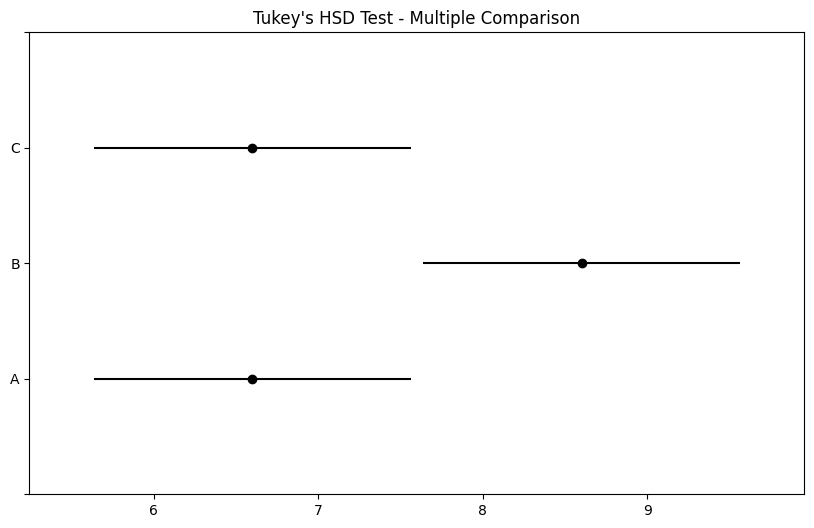

귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 예시 데이터: 각 그룹에서 혈압 감소량 (mmHg)
group1 = [5, 7, 8, 6, 7]  # 신약 A
group2 = [8, 9, 7, 10, 9]  # 신약 B
group3 = [7, 6, 5, 8, 7]  # 신약 C

# 데이터를 하나의 DataFrame으로 합치기
data = pd.DataFrame({
    '혈압감소량': group1 + group2 + group3,
    '그룹': ['A'] * len(group1) + ['B'] * len(group2) + ['C'] * len(group3)
})

display(data)

# ANOVA 결과
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# 사후검정 (Tukey's HSD)
tukey_res = pairwise_tukeyhsd(endog=data['혈압감소량'], groups=data['그룹'], alpha=0.05)

# 결과 출력
print(tukey_res)

# 시각화
tukey_res.plot_simultaneous()
plt.title("Tukey's HSD Test - Multiple Comparison")
plt.show()

# 결론 도출 (사후검정 결과를 참고하여 해석)
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 신약 간에 혈압 감소 효과에 차이가 있다.")
else:
    print("귀무가설 채택: 신약 간에 혈압 감소 효과에 차이가 없다.")

- A와 B약물간의 차이가 있음
- B와 C약물간의 차이가 있음

결과적으로 B의 약물이 더 고혈압 효능에 좋다는 것을 입증

### Q4) 2-3 ANOVA: 페이지 A,B,C간 체류율 비교
- A/B검정이 아닌 A/B/C/D의 수치 데이터를 비교

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175


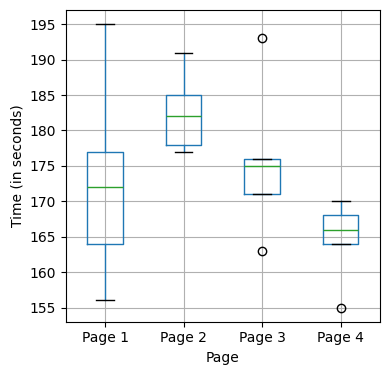

In [ ]:
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/four_sessions.csv"
four_sessions = pd.read_csv(url)
display(four_sessions.head(3))
ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')
plt.tight_layout()
plt.show()

In [ ]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.3f}')
print(f'p-value: {res.pvalue / 2:.3f}')

F-Statistic: 1.370
p-value: 0.039


### Q5) 2-4 사후검정: 페이지 A,B,C간 체류율 비교
- 최소 1개의 페이지가 다른 것을 알았다. 그럼 어떤 페이지가 차이가 날까?



사후 검정 결과 (Tukey's HSD):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Page 1 Page 2      9.8 0.4379  -8.3984 27.9984  False
Page 1 Page 3      2.8 0.9706 -15.3984 20.9984  False
Page 1 Page 4     -8.2 0.5825 -26.3984  9.9984  False
Page 2 Page 3     -7.0 0.6943 -25.1984 11.1984  False
Page 2 Page 4    -18.0 0.0531 -36.1984  0.1984  False
Page 3 Page 4    -11.0 0.3416 -29.1984  7.1984  False
-----------------------------------------------------


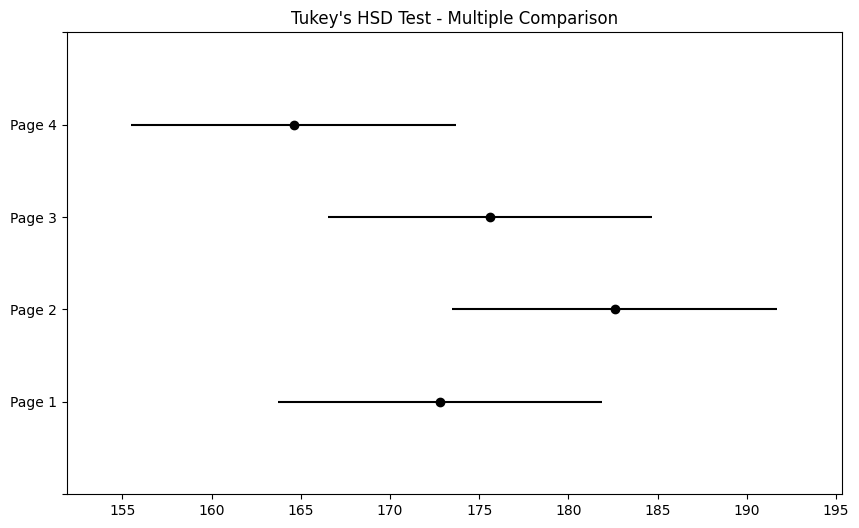

In [ ]:
# 사후 검정 (Tukey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\n사후 검정 결과 (Tukey's HSD):")
tukey = pairwise_tukeyhsd(
    endog=four_sessions['Time'],
    groups=four_sessions['Page'],
    alpha=0.05
)
print(tukey)

# 시각화 (Optional)
import matplotlib.pyplot as plt
tukey.plot_simultaneous()
plt.title("Tukey's HSD Test - Multiple Comparison")
plt.show()

- 결과해석
    - 사후 검정 결과 모든 경우의 수가 통계적으로 유의하지 않음
    - ANOVA분석으로는 전체적인 그룹 간 차이가 존재하지만, 사후 검정을 통해 개별 간 차이는 유의하지 않을 수 있음
    - 이유: ANOVA는 전체 그룹 간 평균 차이를 검정/ 반면 사후검정은 개별 그룹 간 차이를 검정, 데이터 분산이 크거나 표본 크기가 충분하지 않은 경우 이런 결과가 생길 수 있음.

## 3. 연습문제

### Q6) 신뢰구간 구하기
- 12건의 광고시간을 측정했다. 평균 15.5초, 분산 3.2초 일 때 모평균의 90% 신뢰구간을 구하시오.(ADP 32회 기출)

In [ ]:
from scipy.stats import t
import numpy as np

x_bar = 15.5
s = np.sqrt(3.2)
n = 12
confidence_interval = 0.9

lower_bound, upper_bound = t.interval(0.9, loc = x_bar,df = n-1, scale = s / np.sqrt(n))
print(f'{lower_bound:.3f}, {upper_bound:.3f}')

14.573, 16.427


- 해설: 모분산을 모를때는 t분포를 이용해서 모평균으 신뢰구간을 구한다.

### Q7) 가설검정문제
- 목초에 따른 우유의 생산량을 알아보기 위하여 25마리 젖소를 대상으로 3주동안 임의로 추출된 12마리 젖소에게 건조시킨 목초를 주고 13마리 젖소에게는 들판에서 말린 목초를 주었다.
- 두 종류의 모 표준편차는 같다고 가정(**등분산 가정 만족**)하고 또한 우유생산량의 자료는 정규분포를 따른다고 가정(**정규성 가정 만족**)한다.
- 자연적으로 말린 목초의 사육하는 젖소의 우유생산량이 인공적으로 말린 목초로 사용하는 젖소보다 많다고 할 수 있는지 유의수준 0.05 에서 검정하세요.(단측 검정)

In [ ]:
import numpy as np
from scipy import stats

# 데이터 입력
nature = [44, 44, 56, 46, 47, 38, 58, 53, 49, 35, 46, 30, 31]  # 자연적으로 말린 목초
artificial = [35, 47, 55, 29, 40, 39, 32, 41, 42, 57, 51, 39]       # 인공적으로 말린 목초

# 독립 표본 t-검정 (one-tailed, 등분산 가정)
t_stat, p_value = stats.ttest_ind(nature , artificial, alternative='greater', equal_var=True)

print(f"t-통계량: {t_stat:.3f}")
print(f"p-값: {p_value:.3f}")

# 유의수준 알파 (0.05)
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 자연적으로 말린 목초를 사용하는 젖소의 우유 생산량이 인공적으로 말린 목초를 사용하는 젖소보다 많다고 할 수 있습니다.")
else:
    print("귀무가설을 채택합니다. 자연적으로 말린 목초를 사용하는 젖소의 우유 생산량이 인공적으로 말린 목초를 사용하는 젖소보다 많다고 할 수 없습니다.")

'''
귀무가설: 두 젖소 그룹의 생산량은 같다.
대립가설: 자연적으로 말린 목초를 사용하는 젖소의 우유 생산량이 더 크다.
t-통계량: 0.606
p-값: 0.275
귀무가설을 채택합니다. 자연적으로 말린 목초를 사용하는 젖소의 우유 생산량이 인공적으로 말린 목초를 사용하는 젖소보다 많다고 할 수 없습니다
'''

### Q8) 카이제곱 검정
- 연령대에 따라 먹는 아이스크림의 차이가 있는지 유의수준 5% 내 독립성 검정

In [ ]:
import pandas as pd
df = pd.DataFrame({
    '아이스크림':['딸기', '초코', '바닐라', '딸기', '초코', '바닐라'],
    '연령':['10대', '10대', '10대', '20대', '20대', '20대'],
    '인원' : [200, 190, 250, 220, 250, 300]
})
df

,아이스크림,연령,인원
0,딸기,10대,200
1,초코,10대,190
2,바닐라,10대,250
3,딸기,20대,220
4,초코,20대,250
5,바닐라,20대,300


In [ ]:
from scipy.stats import chi2_contingency

# pd.crosstab(index=, columns=, values=, aggfunc=sum)
table = pd.crosstab(index=df['연령'], columns=df['아이스크림'], values=df['인원'],
aggfunc=sum)

# 위와 같이 교차표 만들어서 입력
statistic, pvalue, dof, expected = chi2_contingency(table)

print(statistic)
print(pvalue)
print(dof)
print(np.round(expected,2))

1.708360126075226
0.4256320394874311
2
[[190.64 249.65 199.72]
 [229.36 300.35 240.28]]


<ipython-input-8-226edafee35e>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.crosstab(index=df['연령'], columns=df['아이스크림'], values=df['인원'],


### Q9) 분산분석
- 다음 3개의 반에 대한 수학점수이다. 3개의 반에 대한 수학 학업 성취도가 다른지 확인해보자

In [ ]:
import scipy.stats as stats

group1 = [ 72, 84, 76, 88, 100]
group2 = [81, 63, 75, 97, 99]
group3 = [90, 62, 94, 76, 88]


# 1. 정규성: Shapiro-Wilk 사용
_, p_value1 = stats.shapiro(group1)
_, p_value2 = stats.shapiro(group2)
_, p_value3 = stats.shapiro(group3)
alpha = 0.05

for p_values in [p_value1,p_value2,p_value3]:
    if p_values > 0.05:
        print('정규성을 따름')
    else:
        print('정규성을 따르지 않음')

# 3. 등분산성: Levene 검정 사용
_, p_value_levene = stats.levene(group1, group2, group3)

if p_value_levene > 0.05:
    print('등분산성을 만족함')
else:
    print('만족하지 않음')


# 분산 분석 수행
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# 결과 출력
print(f"F-Statistic {f_statistic:.3f}:", )
print(f"P-Value:, {p_value:.3f}")
t='기각한다. 적어도 하나의 그룹의 평균은 다른 그룹과 유의하게 다르다.'
f='채택한다. 그룹 간의 평균은 모두 동일하다.'

print('귀무가설을 ',t if p_value<=0.05 else f)

정규성을 따름
정규성을 따름
정규성을 따름
등분산성을 만족함
F-Statistic 0.029:
P-Value:, 0.972
귀무가설을  채택한다. 그룹 간의 평균은 모두 동일하다.


## 3. 선형회귀모델 만들기(with statsmodel)

In [ ]:
import statsmodels.api as sm
import pandas as pd

# 예제 데이터 생성
data = pd.DataFrame({
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Y': [2.1, 4.3, 6.2, 8.5, 10.1, 12.4, 14.3, 16.7, 18.6, 20.9]
})

# 독립 변수에 상수 추가 (Statsmodels는 상수를 포함해야 함)
X = sm.add_constant(data['X'])  # 상수항 추가
Y = data['Y']

# 선형 회귀 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀 결과 출력
regression_summary = model.summary()
regression_summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           4.75e-14
Time:                        06:38:30   Log-Likelihood:                 4.7103
No. Observations:                  10   AIC:                            -5.421
Df Residuals:                       8   BIC:                            -4.815
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.115      0.231      0.823      -0.239       0.293
X              2.0697      0.019    111.296      0.000       2.027       2.113
==============================================================================
Omnibus:                        0.708   Durbin-Watson:                   2.595
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.646
Skew:                          -0.412   Prob(JB):                        0.724
Kurtosis:                       2.067   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""